<a href="https://colab.research.google.com/github/gujralvikas/hello-world/blob/master/pilot_makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
words = open('First.txt','r').read().splitlines()

In [3]:
words = [w.lower() for w in words]

In [4]:
len(words)

1165

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)
for w in words:
    if len(w) == 2:
        print(w)

om


In [102]:
import torch
import torch.nn.functional as F

In [8]:
N = torch.zeros ((27,27), dtype = torch.int32)

In [9]:
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi ['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      N[ix1,ix2] += 1
N.shape

torch.Size([27, 27])

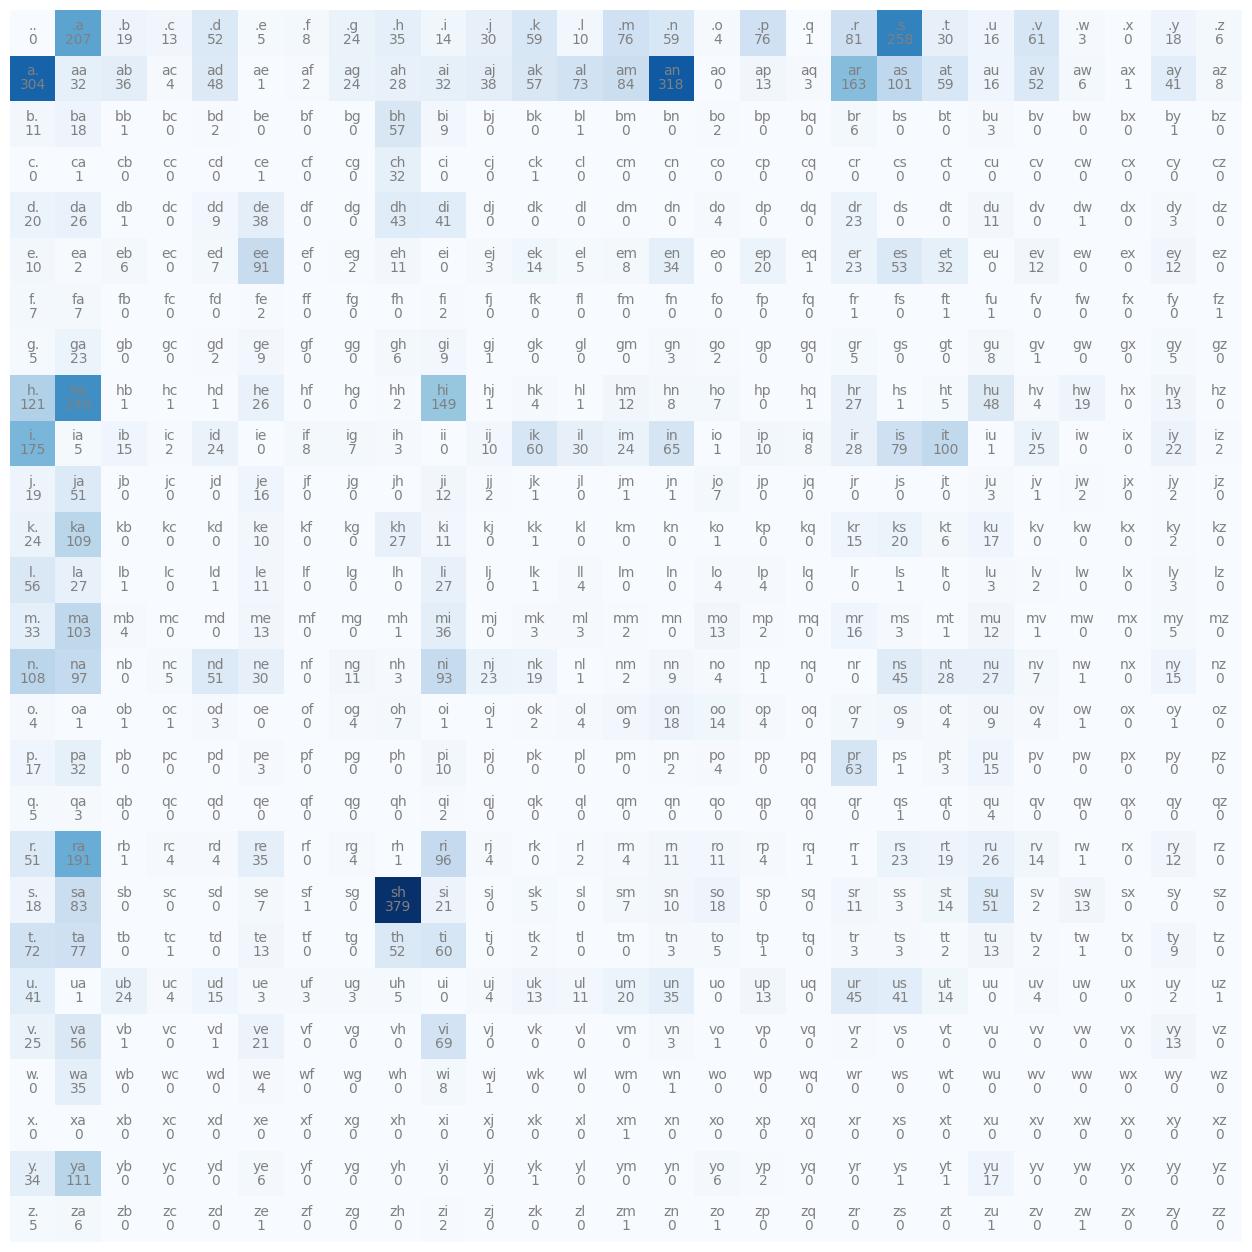

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [12]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1777, 0.0163, 0.0112, 0.0446, 0.0043, 0.0069, 0.0206, 0.0300,
        0.0120, 0.0258, 0.0506, 0.0086, 0.0652, 0.0506, 0.0034, 0.0652, 0.0009,
        0.0695, 0.2215, 0.0258, 0.0137, 0.0524, 0.0026, 0.0000, 0.0155, 0.0052])

In [13]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
itos[ix]

'd'

In [14]:
torch.multinomial(p,num_samples=50,replacement=True, generator=g)

tensor([11, 19,  1,  8,  2,  1, 18, 16, 16, 22, 14, 19, 25,  1, 19, 18, 13,  1,
        19,  1,  4, 19, 13, 18,  6, 11,  2,  7, 10,  7, 19, 13,  4, 11,  4, 13,
        19, 19, 18, 13, 19, 16, 11, 19,  8,  9, 10, 22, 20, 13])

In [15]:
P = (N+1).float()
P /= P.sum(1,keepdim=True)
P[0].sum()

tensor(1.)

In [16]:
g = torch.Generator().manual_seed(2147483647)

for i in range (10):
  out = []
  ix=0
  while True:
    p = P[ix]
    ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

deebh.
pral.
urari.
zkayhamrinimititinjakavk.
ka.
ar.
samithubjabhrigotashishishanik.
swateda.
ka.
haka.


In [121]:
log_likelihood = 0.0
n=0
#for w in words:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      prob = P[ix1,ix2]
      logprob = torch.log(prob)
      log_likelihood += logprob
      n += 1
      # print(f'{ch1} {ch2}: {prob:.3f} {logprob:.3f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-19695.9883)
nll=tensor(19695.9883)
2.250455617904663


In [142]:
# create the training set of all bigrams
xs, ys = [],[]

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      # print(ch1, ch2)
      xs.append(ix1)
      ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:',num)

number of examples: 8752


In [143]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [158]:
# gradient descent
for k in range(100):
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N -- This is the softmax function
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = - probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -3 * W.grad
print(loss.item())

2.257598638534546


In [161]:
# Sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for i in range (10):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character

    ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

deebh.
pral.
urari.
prtahamrinimititinjakavi.
ka.
ar.
samithubjabhrigotashishishanik.
swateda.
ka.
haka.


In [80]:
# details on how the neural net and loss calculation works
nlls = torch.zeros(9)
for i in range(9):
  # i-th bigram
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:',x)
  print('output probabilities from the neural net:',probs[i])
  print('label (actual next character):',y)
  p = probs[i,y]
  print('probability assigned by the net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:',logp.item())
  nll = -logp
  print('negative log likelihood:',nll.item())
  nlls[i] = nll
print('===================')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 1
probability assigned by the net to the correct character: 0.009982486255466938
log likelihood: -4.6069231033325195
negative log likelihood: 4.6069231033325195
--------
bigram example 2: ab (indexes 1,2)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0150, 0.0086, 0.0396, 0.0100, 0.0606, 0.0308, 0.1084, 0.0131, 0.0125,
        0.0048, 0.1024, 0.0086, 0.0988, 0.0112, 0.0232, 0.0207, 0.0408, 0.0078,
        0.0899, 0.0531, 0.0463, 0.0309, 0.0051, 0.0329, 0.0654, 0.0503, 0.0091])
label (actual next character): 2
probability assigned by the net to the correct character: 0.0396367

In [67]:
probs.shape

torch.Size([9, 27])

tensor(4.1075)